# Iris Classification

#### Aim-To perform classification analysis on Iris dataset. Perform any two classification algorithms and compare the accuracy.

# Table of contents

1.[Importing libraries](#1.-Importing-libraries)

2.[Load Data Set](#2.-Load-Data-Set)

3.[Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

4.[Data Visualization](#4.-Data-Visualization)

- [Count plot](#4.1-Count-plot)

- [Scatter plot](#4.2-Scatter-plot)

- [Pairplot](#4.3-Pairplot)

- [Histogram](#4.4-Histogram)

- [Correlation Analysis](#4.5-Correlation-Analysis)

5.[Spilt the Data](#5.Split-the-data-into-X-and-Y)

- [Data Standardization](#Data-Standardization)

6.[Train Test Split](#6.-Train-Test-Split)

7.[Classification](#7.Classification)

- [K Nearest Neighbours](#K-Nearest-Neighbour-(KNN))
    
- [Decision Tree](#Decision-Tree)

8.[Conclusion](#Conclusion)


# Introduction

#### The Iris flower data set is also know as the Fisher's Iris data set. It is a multivariate data set introduced by Ronald Fisher in his paper. The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

#### The data set consists of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), under five attributes -

1.sepal length(in cm)

2.sepal width(in cm)

3.petal length(in cm)

4.petal width(in cm)

5.species 

# 1. Importing libraries

**NumPy**: is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas**: pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**Matplotlib**: For charts or plots.

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Sklearn**: It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load Data Set

In [3]:
df=pd.read_csv("C:/Users/user/Documents/Data/Iris.csv")

# 3. Exploratory Data Analysis

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 4. Data Visualization

### 4.1 Count plot

<AxesSubplot:xlabel='count', ylabel='Species'>

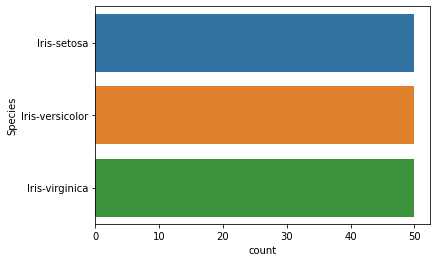

In [13]:
#count plot
sns.countplot(y = 'Species',data = df)

### 4.2 Scatter plot

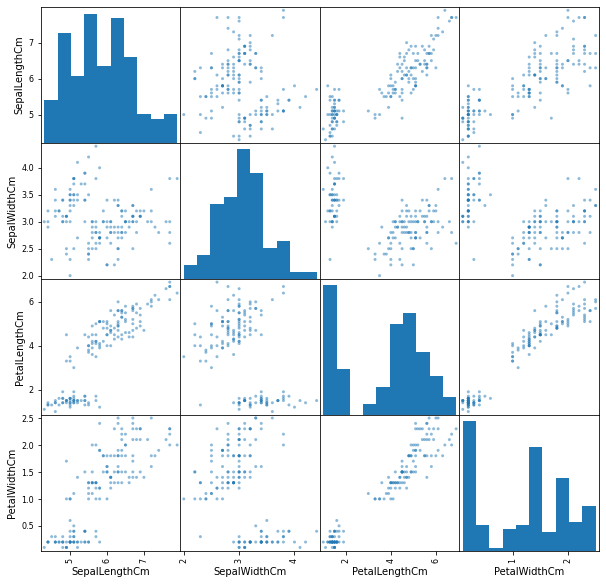

In [15]:
#Scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10));

### 4.3 Pairplot

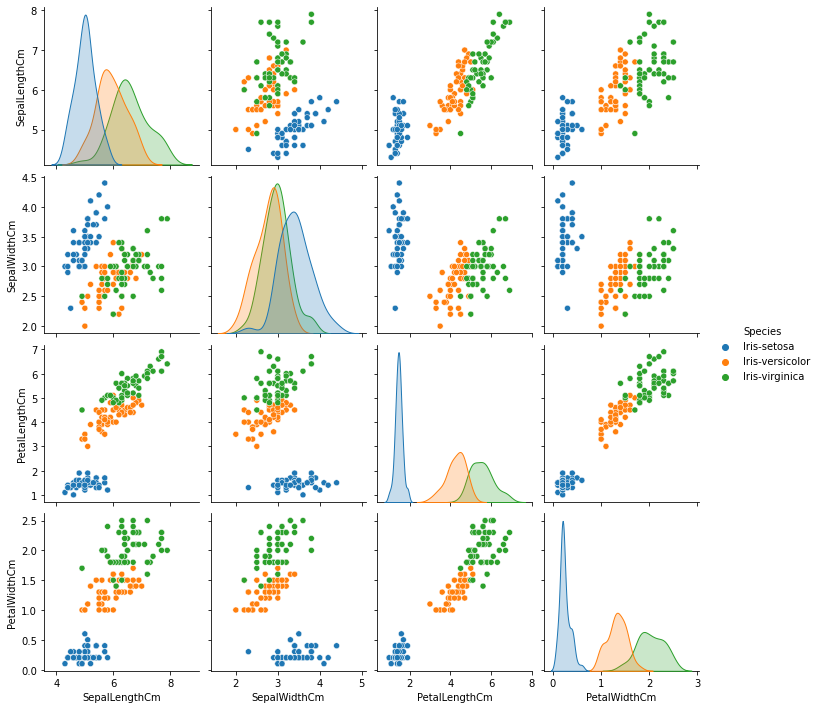

In [16]:
#pairplot
sns.pairplot(df,hue="Species");

### 4.4 Histogram

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

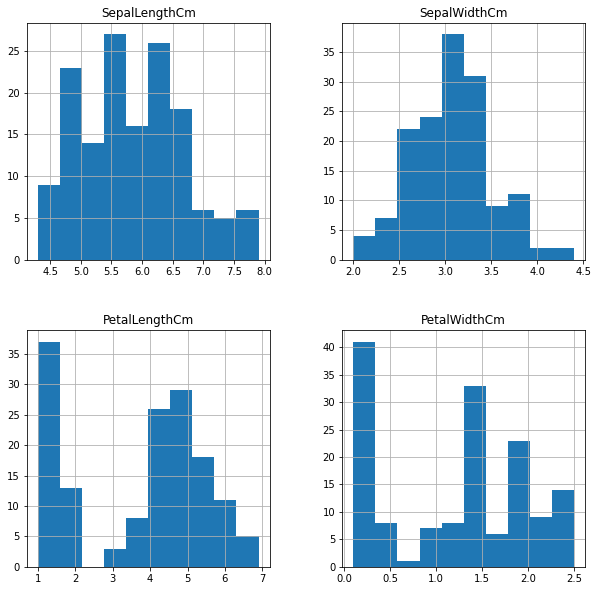

In [17]:
#Histogram
df.hist(figsize=(10,10))

### 4.5 Correlation Analysis

<AxesSubplot:>

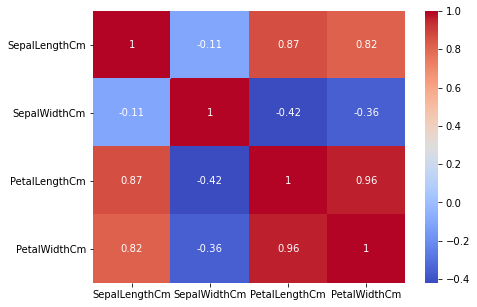

In [18]:
#Correlation Analysis
corr=df.corr()
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# 5.Split the data into X and Y

In [19]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
Y=df[['Species']].values
Y[0:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

### Data Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
s.fit(X)
SX= s.transform(X)
s.fit(X)

StandardScaler()

In [22]:
SX

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# 6. Train Test Split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
print('Train set:', X_train.shape,  Y_train.shape)
print('Test set:', X_test.shape,  Y_test.shape)

Train set: (105, 4) (105, 1)
Test set: (45, 4) (45, 1)


In [24]:
np.unique(Y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([17, 14, 14], dtype=int64))

### Confusion Matrix

In [25]:
def confusion_matrix_plot(yhat):
    labels = ['Iris-versicolor','Iris-virginica', 'Iris-setosa']

    matrix = confusion_matrix(yhat, Y_test, labels=labels)

    fig, ax = plt.subplots(figsize=(7,5))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Oranges")
    ax.set_title("Confusion Matrix", fontsize=16)
    ax.set_xlabel("Predicted", fontsize=13)
    ax.set_ylabel("Actual", fontsize=13)

# 7.Classification

### K-Nearest Neighbour (KNN)
It is one of the simplest Machine Learning algorithms based on Supervised Learning technique.K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using KNN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

In [31]:
#3 species, k=3

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

yhat_KNN=knn.predict(X_test)

print("Accuracy of KNN model: " ,accuracy_score(Y_test,yhat_KNN))

Accuracy of KNN model:  0.9555555555555556


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


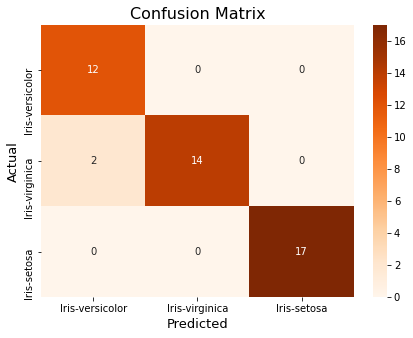

In [32]:
confusion_matrix_plot(yhat_KNN)

### Decision Tree
It is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [37]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,Y_train)

yhat_tree=dt.predict(X_test)

print("Accuracy of Decision Tree model: " ,accuracy_score(Y_test,yhat_tree))

Accuracy of Decision Tree model:  0.9777777777777777


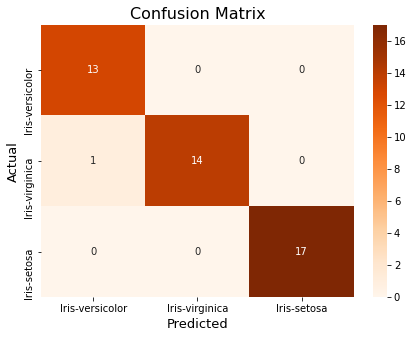

In [38]:
confusion_matrix_plot(yhat_tree)

#### The Complete dataset
Decision Tree classification Algorithm

In [39]:
final_model = DecisionTreeClassifier(criterion="entropy")

final_model.fit(X, Y)

yhat_final = final_model.predict(X)

print("Training set accuracy of the Final Decision Tree Model :", accuracy_score(Y, yhat_final))

Training set accuracy of the Final Decision Tree Model : 1.0


# Conclusion

The purpose of this project was to perform any two classification algorithms on Iris Dataset.Find and compare the accuracy.

#### Comparing the accuarcy of model, it is seen the Decision Tree classification algorithm provides the highest accuracy.

[[Back to top]](#Iris-Classification)